### 3. Feature Detection and Description 

- Teams will implement feature detection and description using OpenCV. 
- Teams will select and implement at least two feature detection/description 
algorithms (SIFT, SURF, ORB, or others). 
- A comparison of the chosen algorithms' performance is required in the evaluation. 

- Hints for comparison: 
    - Number of detected features: How many keypoints does each algorithm detect in the same image? More keypoints are not always better, but a sufficient number is required for reliable matching. Students could create a plot of the number of features detected vs frame number. 
    - Matching performance: How many correct matches are found by each algorithm? This can be evaluated by visually inspecting a subset of the matches. Students could visualise the matches using a small number of image pairs (e.g., 5-10 pairs). 
    - Computational speed: How long does each algorithm take to detect and describe features? Students can use Python's time module to measure the execution time for this stage. 
    - Robustness to image transformations: How well do the algorithms perform under different conditions, such as changes in scale, rotation, illumination, and viewpoint? This can be done qualitatively by selecting image pairs with significant viewpoint changes and observing the number of matches. 
    - Qualitative assessment: How well do the features visually correspond between frames? Students can create a montage of a few frames, and the feature matches. 
-  Teams must explain the algorithms' parameters and justify their values. 

### SIFT Algorithm

In [52]:
import cv2
import matplotlib.pyplot as plt
import time

In [53]:
# pip install imageio[ffmpeg]
import imageio.v3 as iio
import matplotlib.pyplot as plt

def load_video_frames(video_path, frame_interval=10, display_frames=True):
    # Load frames from a video file at specified intervals.

    frame_count = 0
    frames = []  # List to store frames for visualization

    try:
        print(f"Opening video file: {video_path}")
        
        # Iterate through frames in the video file
        for frame in iio.imiter(video_path):
            if frame_count % frame_interval == 0:
                frames.append(frame)  # Store frame in list
                
                # Display frame if display_frames is True
                if display_frames:
                    plt.imshow(frame)
                    plt.title(f'Frame {frame_count}')
                    plt.axis('off')
                    plt.show()
                
            frame_count += 1

    except FileNotFoundError:
        print(f"Error: Video file not found at {video_path}")
        return [], 0
    except Exception as e:
        print(f"An error occurred while processing the video: {e}")
        return [], 0

    print(f"\nFinished processing video.")
    print(f"Total frames iterated: {frame_count}")
    
    return frames

frames = load_video_frames('../videos/mountains.mp4', frame_interval=1, display_frames=False)

Opening video file: ../videos/mountains.mp4

Finished processing video.
Total frames iterated: 304


SIFT took 0.2530 seconds to process two images.


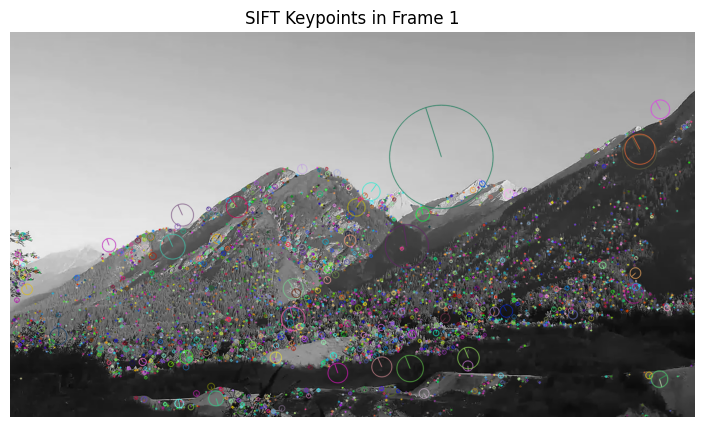

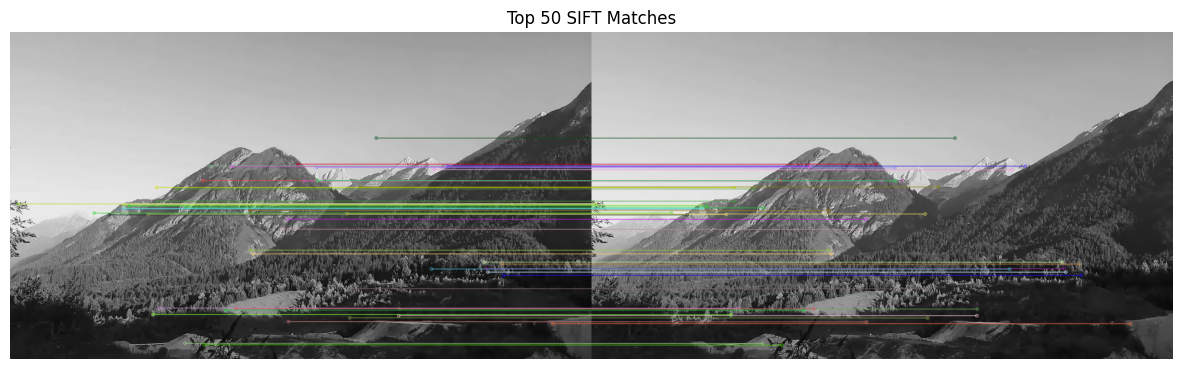

In [ ]:
filepath1 = "../Images/Tesla-model-s-2022.jpg"
filepath2 = "../Images/tesla-model-s-used.jpg"

# Load two sample grayscale frames
img1 = cv2.cvtColor(frames[0], cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(frames[7], cv2.COLOR_BGR2GRAY)

# Initialize SIFT detector - TO TUNE PARAMETERS
sift = cv2.SIFT_create(nfeatures=500, contrastThreshold=0.04, edgeThreshold=10, sigma=1.6)

# Time the detection and description process
start_time = time.time()
keypoints1, descriptors1 = sift.detectAndCompute(img1, None)
keypoints2, descriptors2 = sift.detectAndCompute(img2, None)
elapsed_time = time.time() - start_time
print(f"SIFT took {elapsed_time:.4f} seconds to process two images.")

# Visualize keypoints
img_kp1 = cv2.drawKeypoints(img1, keypoints1, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize=(10, 5))
plt.imshow(img_kp1, cmap='gray')
plt.title("SIFT Keypoints in Frame 1")
plt.axis('off')
plt.show()

# Brute-Force matcher with Euclidean distance
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(descriptors1, descriptors2)
matches = sorted(matches, key=lambda x: x.distance)

# Draw matches
img_matches = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches[:50], None, flags=2)
plt.figure(figsize=(15, 7))
plt.imshow(img_matches)
plt.title("Top 50 SIFT Matches")
plt.axis('off')
plt.show()